# **Problem Definition**

As a **Civil Engineer**, I came across a project on Kaggle that combines **Civil Engineering** and **Data Science**. The project is based on the "*Civil Engineering: Cement Manufacturing Dataset*." This dataset contains information about cement manufacturing and concrete properties. You can find the dataset on Kaggle using the following link: [Cement Manufacturing Dataset](https://www.kaggle.com/datasets/vinayakshanawad/cement-manufacturing-concrete-dataset?datasetId=1459683).
<br><br>
## **Problem Description**

Let's begin by discussing concrete, assuming that the reader has limited technical knowledge about the mixture:
<br><br>
- The target variable we are interested in is the **Compressive Strength**, which is a measure of the concrete's ability to withstand compressive forces. It is calculated using the formula: Strength = Force / Area. The unit of strength is Newtons per square millimeter (MPa).<br><br>

- There are eight features in the dataset that describe the concrete mixture:<br><br>

1. **Cement**: This is the main material used in concrete. The compressive strength is highly correlated with the amount of cement used. However, the ratios of other materials, such as water and cementitious materials like ash, also directly affect the strength. The data for cement is measured in kilograms per cubic meter.<br><br>

2. **Blast Furnace Slag**: This material is commonly referred to as slag. It is a byproduct of steel manufacturing and has cementitious properties. Slag is often used as a cheaper alternative to cement, although it provides relatively less strength. Blast Furnace Slag is a specific type of slag produced during the manufacturing of steel products indirectly. Steel factories can sell it to cement factories.<br><br>

3. **Fly Ash**: Fly ash is another material that contains cementitious properties. It is a byproduct of coal combustion in the fuel industry. Fly ash can be used in specific ratios in concrete mixtures.<br><br>

4. **Water**: Water is an essential component in concrete manufacturing. The dataset records the weight of water tanks used in the factory, measured in kilograms per cubic meter.<br><br>

5. **Superplasticizer**: Superplasticizer is an additive chemical compound used in concrete mixtures to reduce the amount of water required and increase compressive strength.<br><br>

6. **Coarse Aggregate**: This refers to a specific ratio of coarse aggregate used in the concrete mix.<br><br>

7. **Fine Aggregate**: This refers to a specific ratio of fine aggregate used in the concrete mix.<br><br>

8. **Age**: This feature represents the number of days between the casting day and the testing day when the compressive strength of the concrete specimen is measured.<br><br>

## **Problem Topic**

Based on the problem definition and description, the problem topic is a **Supervised Learning** problem. The specific algorithm used for prediction is yet to be determined. The task is to predict the compressive strength of concrete using **Machine Learning** techniques applied to a dataset containing the eight features described in the Problem Description section.<br><br>

## **About the Data**
As mentioned previously the data is open for public in Kaggle, the author of the data is VINAYAK SHANAWAD. 

The data has 1030 observations (number of mixes) and 9 columns, such that 8 columns  are considered as features to predict the compressive strength.

All the features are numerical and we have no categorical data.

In the EDA stage , we found that no missing values , but we have 25 duplicated rows, such that I decided to drop them because we are looking to different concrete mixture , note that in other project removing duplicated rows may not be the best decision, as it depends on the understanding of the problem and the purpose of the task beyond the dataset.<br><br>

## **References**

- [Cement Manufacturing Dataset on Kaggle](https://www.kaggle.com/datasets/vinayakshanawad/cement-manufacturing-concrete-dataset?datasetId=1459683)
- [GitHub Repository for this Notebook](https://github.com/laithrasheed/DTSA_5509_Supervised_Learning_Final_Project.git)

## **Data Cleaning and EDA Stage**

In [1]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Read the 'concrete.csv' file into a DataFrame
df = pd.read_csv('concrete.csv')

# Display the first four rows of the DataFrame
df.head(4)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85


In [2]:
# Retrieve and display the shape of the DataFrame to determine its dimensions
df.shape

(1030, 9)

In [3]:
# Retrieve and print the column names of the DataFrame
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [4]:
# Renaming columns to provide clear and representative feature names
df = df.rename(columns={'cement': 'Cement', 'slag': 'Blast_Furnace_Slag', 'ash':'Fly_Ash', 'water': 'Water', 'superplastic': 'Superplasticizer', 'coarseagg': 'Coarse_Aggregate', 'fineagg':'Fine_Aggregate', 'age': 'Age_Days', 'strength': 'Strength'})

# Displaying the updated column names
df.columns

# In machine learning, it is generally recommended to have clear and representative feature column names
# even if they are relatively longer. This practice improves code readability, collaboration, and communication.

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age_Days', 'Strength'],
      dtype='object')

In [5]:
# Displaying concise summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast_Furnace_Slag  1030 non-null   float64
 2   Fly_Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse_Aggregate    1030 non-null   float64
 6   Fine_Aggregate      1030 non-null   float64
 7   Age_Days            1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
# Checking and counting the number of duplicated observations in the DataFrame
df.duplicated().sum()

# As the observations represent unique ratios for the concrete mixture,
# it is important to identify and remove any duplicates. This ensures that we have
# a dataset with only unique mixtures, which is crucial for accurately performing
# the regression task of predicting the Compressive Strength.

25

In [7]:
# Dropping duplicated rows to ensure data integrity and eliminate redundancy
df = df.drop_duplicates()

# After removing the duplicated rows, the DataFrame now has updated dimensions
df.shape

(1005, 9)

In [8]:
# Checking for missing values in the DataFrame
# The sum of the sum() function on df.isna() provides the total count of missing values
# In this case, the result is 0, indicating that the DataFrame has no missing values
df.isna().sum().sum()

0

In [9]:
# Checking the data type for each column in the DataFrame
df.dtypes

Cement                float64
Blast_Furnace_Slag    float64
Fly_Ash               float64
Water                 float64
Superplasticizer      float64
Coarse_Aggregate      float64
Fine_Aggregate        float64
Age_Days                int64
Strength              float64
dtype: object

In [10]:
# Counting the number of unique values in each feature
# The result is sorted in descending order to identify features with the highest variability
df.nunique().sort_values(ascending=False)

Strength              845
Fine_Aggregate        302
Coarse_Aggregate      284
Cement                278
Water                 195
Blast_Furnace_Slag    185
Fly_Ash               156
Superplasticizer      111
Age_Days               14
dtype: int64

In [11]:
# Generating descriptive statistics for the DataFrame
df.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age_Days,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


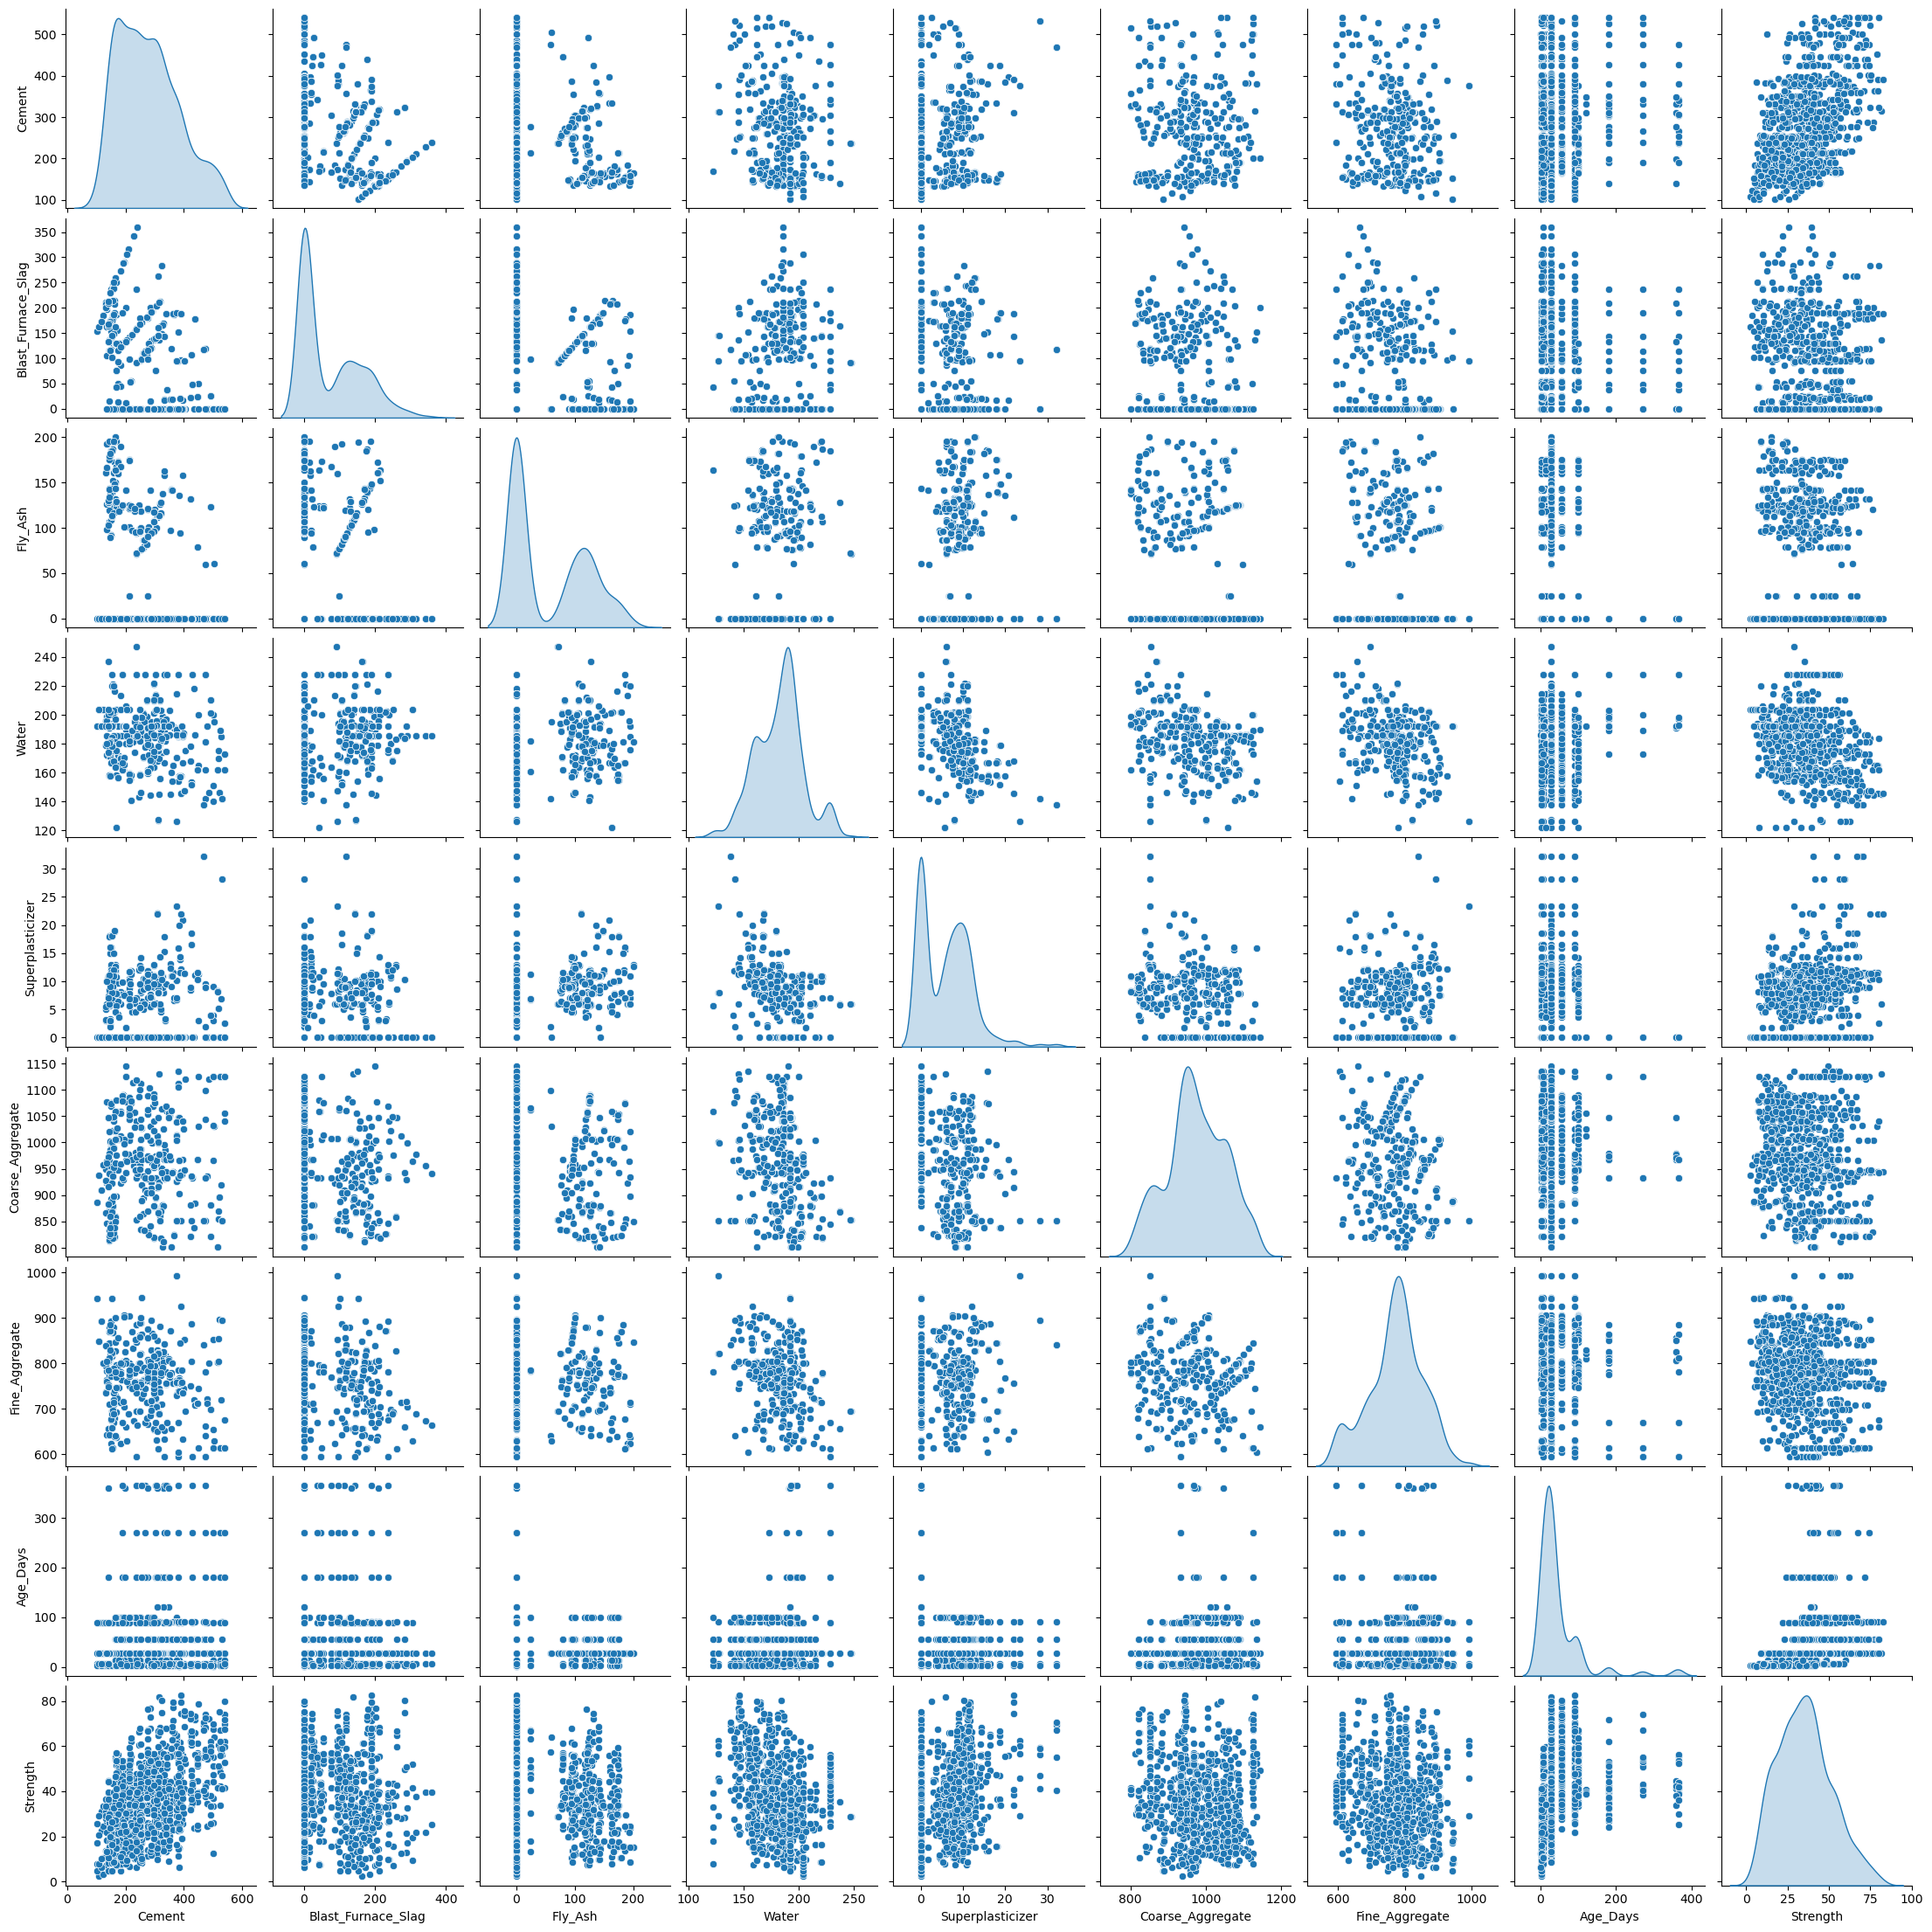

In [12]:
# Importing the seaborn library for data visualization
import seaborn as sns

# Creating a pair plot to visualize the relationships between pairs of variables
# The diagonal elements are represented as KDE (Kernel Density Estimate) plots
sns.pairplot(df, diag_kind='kde')

<Axes: >

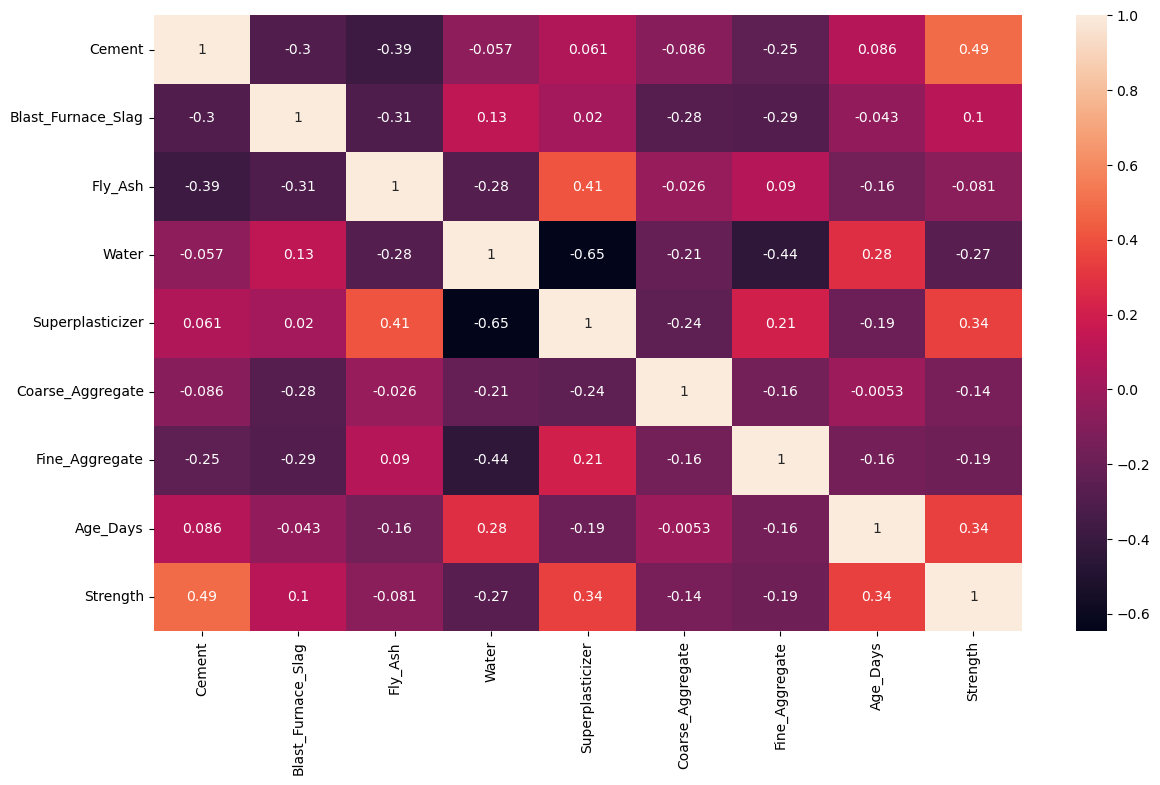

In [13]:
 # Importing the matplotlib library for data visualization
import matplotlib.pyplot as plt 

# Creating a figure with a specific size for the heatmap
plt.figure(figsize=(14, 8))

# Creating a correlation heatmap to visualize the relationships between variables
# The 'annot=True' argument displays the correlation values on the heatmap
sns.heatmap(df.corr(), annot=True)

In [14]:
# convert the new dataframe from Python to Excel to do some data visualization in Tabluea
df.to_excel('Concrete_Cleaned.xlsx')

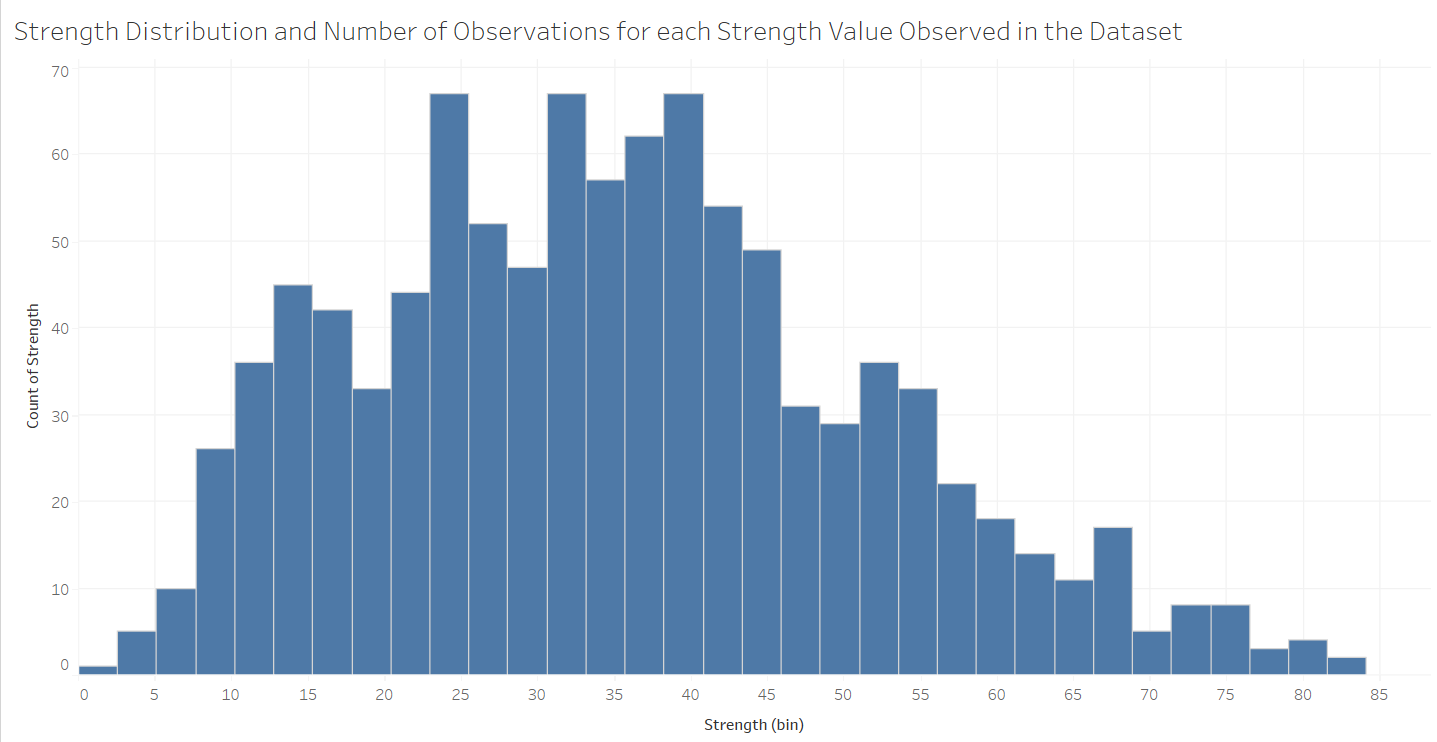

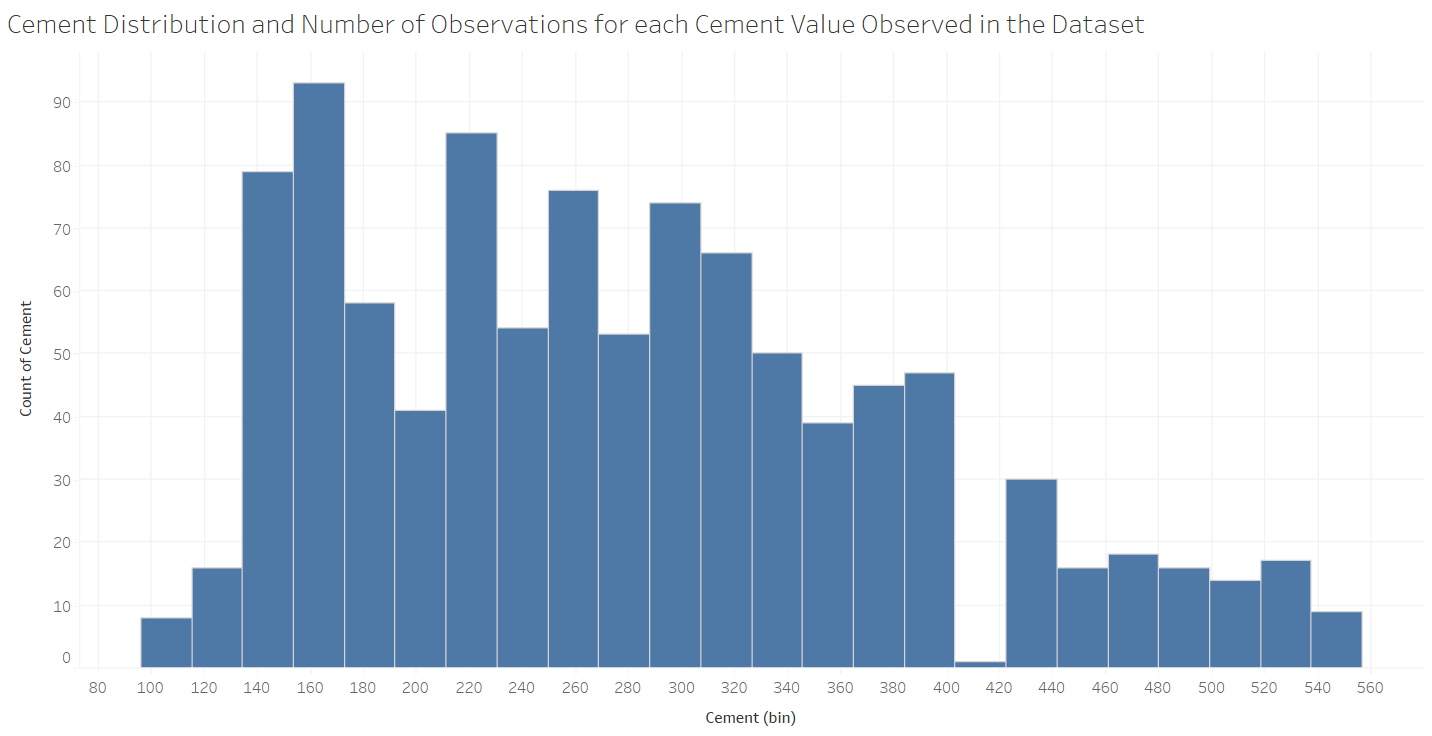

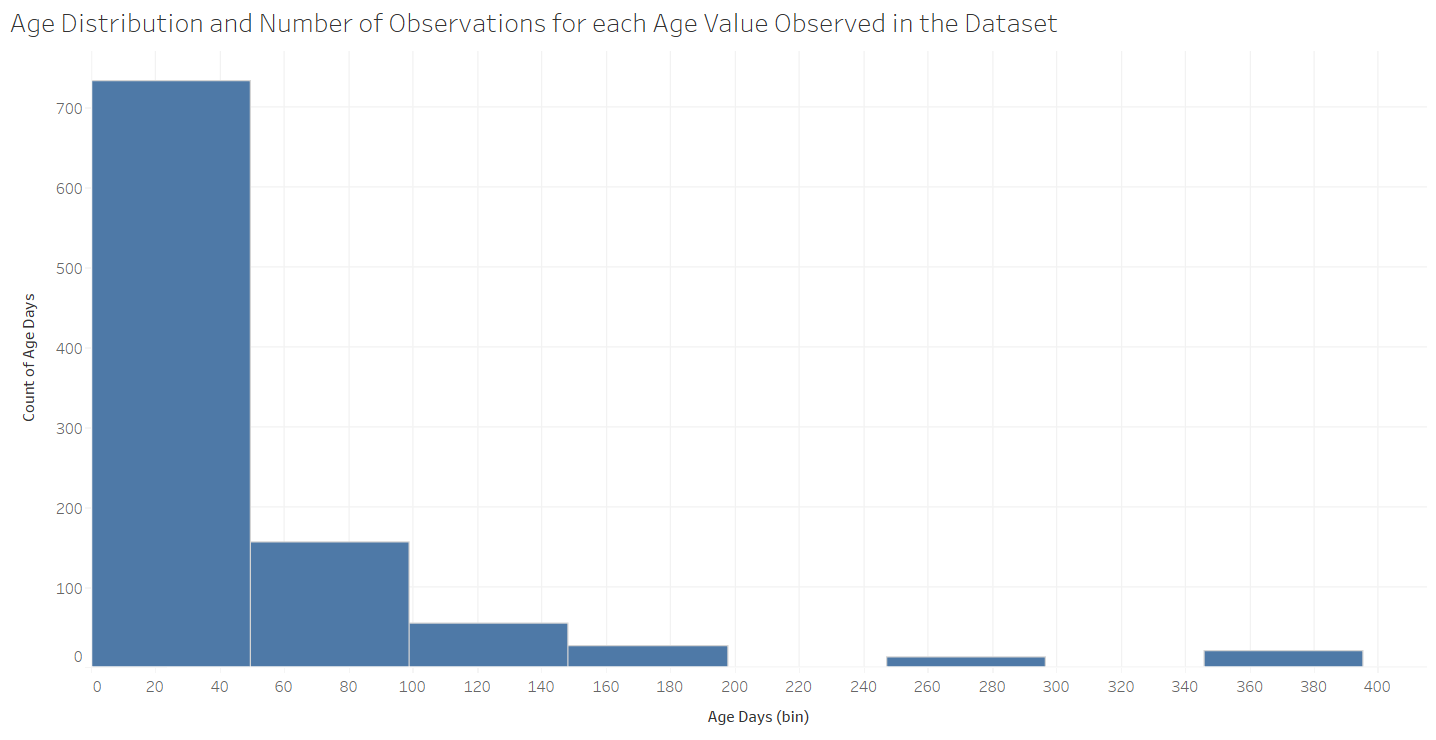

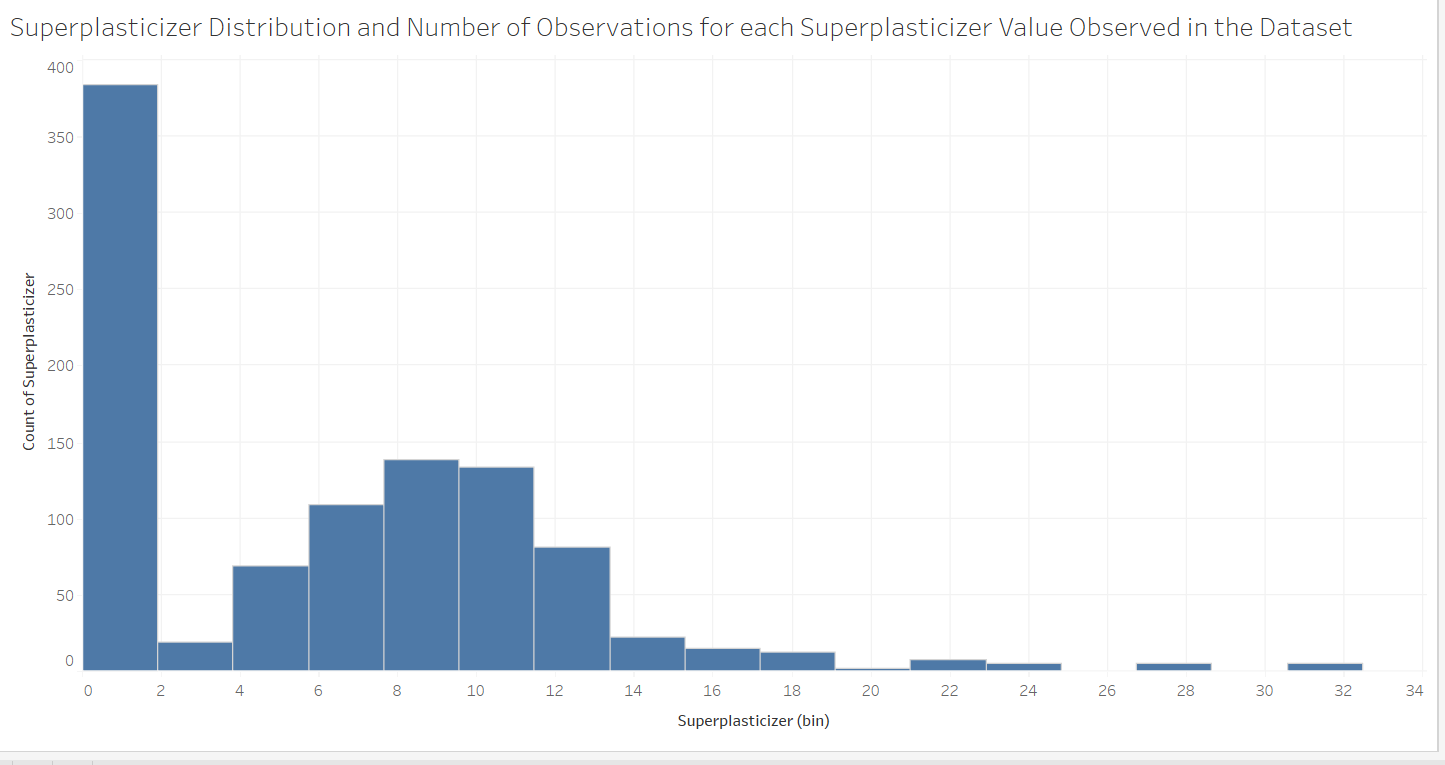

### **Conclusions and Discussions for Data Cleaning and EDA Stage**

The dataset has 9 features in total, 8 of them are numerical features, and the last one is our target, which is the prediction of strength.

The original raw data has 1030 observations, but 25 of them are duplicates. I have decided to drop these duplicated rows after understanding the problem, resulting in 1005 rows.

There are no features that need to be dropped. All features are very important for the prediction process of the target.

I found that renaming the features is useful for many reasons, including helping the reader to keep in mind the correct description of the feature.

We have no missing values, and all the data types of the features are stored correctly.

Since we have a regression problem, we don't have issues with imbalance. However, we can look at the diagonal plots in the pairplot. Let's have a look at the distribution of the target. I think we have a good distribution without outliers.

Regarding the other pairplots, it is clear that we have no linear relationship between the other features. I am going to implement many algorithms to select the best model that gives the best evaluation metrics. This part will be well described after implementing the modeling stage.

With reference to the correlation matrix, I found that the Cement, Superplasticizer, and Age features are the most correlated features to the target Strength.

After having the simple visualizations for the most important features, I decided to make further statistical analysis. This is the first step that helps in making the statistical hypotheses generation and related statistical tests.

## **Statiscal Testing and Modeling Stage**

In [15]:
import statsmodels.api as sm

# Preparing the data
X = df[['Superplasticizer', 'Age_Days', 'Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Coarse_Aggregate', 'Fine_Aggregate']]  # Predictor variables
y = df['Strength']  # Target variable

# Adding a constant term to the predictor variables
X = sm.add_constant(X)

# Fitting the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Printing OLS regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     189.8
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.40e-194
Time:                        13:43:48   Log-Likelihood:                -3764.4
No. Observations:                1005   AIC:                             7547.
Df Residuals:                     996   BIC:                             7591.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -17.9198     26

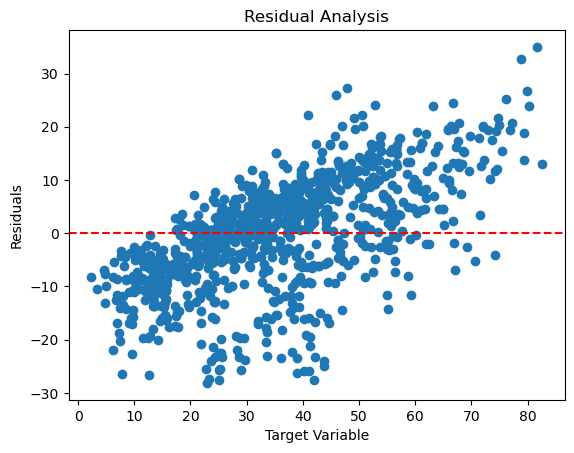

In [16]:
# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Calculate the residuals
residuals = results.resid

# Plot the residuals
import matplotlib.pyplot as plt

plt.scatter(y, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Target Variable')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

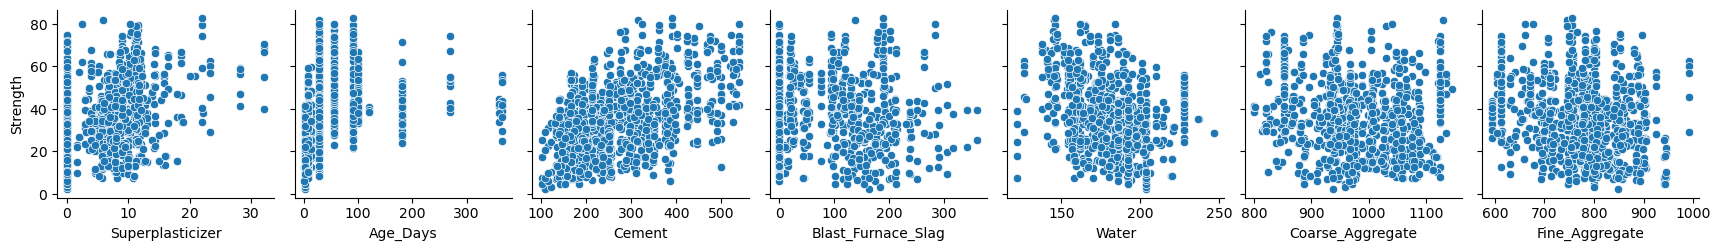

In [17]:
# Plot scatter plots of each predictor variable against the target variable
import seaborn as sns

sns.pairplot(df, x_vars=['Superplasticizer', 'Age_Days', 'Cement', 'Blast_Furnace_Slag', 'Water', 'Coarse_Aggregate', 'Fine_Aggregate'], y_vars='Strength', kind='scatter')
plt.show()

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Fit a nonlinear regression model (Decision Tree)
dt_model = DecisionTreeRegressor()
dt_scores = cross_val_score(dt_model, X, y, cv=5, scoring='r2')

# Fit a nonlinear regression model (Neural Network)
nn_model = MLPRegressor()
nn_scores = cross_val_score(nn_model, X, y, cv=5, scoring='r2')

# Compare the performance of linear and nonlinear models
linear_score = results.rsquared_adj

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost regression model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate R-squared for XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)

# Create and train the Random Forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate R-squared for Random Forest
r2_rf = r2_score(y_test, y_pred_rf)

# Scale the training and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Support Vector Regression model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_svr = svr_model.predict(X_test_scaled)

# Calculate R-squared for Support Vector Regression
r2_svr = r2_score(y_test, y_pred_svr)

# Create and train the Gradient Boosting Regression model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate R-squared for Gradient Boosting Regression
r2_gb = r2_score(y_test, y_pred_gb)

# Create and train the Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate R-squared for Ridge Regression
r2_ridge = r2_score(y_test, y_pred_ridge)

# Create and train the Lasso Regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Calculate R-squared for Lasso Regression
r2_lasso = r2_score(y_test, y_pred_lasso)

# Store the results in a dictionary
results = {
    "Linear Regression": linear_score,
    "Decision Tree Regression (Cross-Validation)": dt_scores.mean(),
    "Neural Network Regression (Cross-Validation)": nn_scores.mean(),
    "XGBoost Regression": r2_xgb,
    "Random Forest Regression": r2_rf,
    "Support Vector Regression": r2_svr,
    "Gradient Boosting Regression": r2_gb,
    "Ridge Regression": r2_ridge,
    "Lasso Regression": r2_lasso
}

# Sort the results by R-squared score in descending order
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)

# Get the best model
best_model = sorted_results[0][0]

# Print the final summary
print("Model Comparison:")
for model, score in sorted_results:
    print(f"{model}: {score}")
print("\nBest Model:", best_model)

D:\ANACONDA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Comparison:
XGBoost Regression: 0.9212052296116391
Random Forest Regression: 0.9172339433343911
Gradient Boosting Regression: 0.896468088755232
Decision Tree Regression (Cross-Validation): 0.8284440187640069
Neural Network Regression (Cross-Validation): 0.7295898277295405
Support Vector Regression: 0.6262211729783689
Linear Regression: 0.6007006607405085
Lasso Regression: 0.5550728149310743
Ridge Regression: 0.5528291756490149

Best Model: XGBoost Regression


## **Building the Model**

In [19]:
# splitting the datasest into 3 datasets: train, validate, and test
train, test = train_test_split(df, test_size=.2, random_state=42)
train, val = train_test_split(train, test_size=.1, random_state=42)

# Splitting the dataset into features (X) and target variable (y)
X_train = train.drop('Strength', axis=1)
y_train = train['Strength']

X_val = val.drop('Strength', axis=1)
y_val = val['Strength']

X_test = test.drop('Strength', axis=1)
y_test = test['Strength']

In [20]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Create an instance of XGBoost regressor
model = xgb.XGBRegressor()  # For regression tasks

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict using the trained model on the validation set
y_pred = model.predict(X_val)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_val, y_pred)

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_val, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
print("Explained Variance Score:", explained_variance)

Mean Squared Error (MSE): 23.799976448935734
Mean Absolute Error (MAE): 2.9597235424135935
R-squared (R2) Score: 0.9004159853592921
Explained Variance Score: 0.9004205588688051


## **Model Optimization**

In [21]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their respective values to search
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
}

# Create an instance of XGBoost regressor
model = xgb.XGBRegressor()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Retrain the model using the best hyperparameters
best_model.fit(X_train, y_train)

# Evaluate the best model on the validation set
y_pred_best = best_model.predict(X_val)

# Calculate the evaluation metrics for the best model
mse_best = mean_squared_error(y_val, y_pred_best)
mae_best = mean_absolute_error(y_val, y_pred_best)
r2_best = r2_score(y_val, y_pred_best)
explained_variance_best = explained_variance_score(y_val, y_pred_best)

# Print the evaluation metrics for the best model
print("Best Model - Mean Squared Error (MSE):", mse_best)
print("Best Model - Mean Absolute Error (MAE):", mae_best)
print("Best Model - R-squared (R2) Score:", r2_best)
print("Best Model - Explained Variance Score:", explained_variance_best)

Best Model - Mean Squared Error (MSE): 18.700437720883606
Best Model - Mean Absolute Error (MAE): 2.659917020091303
Best Model - R-squared (R2) Score: 0.9217535081272152
Best Model - Explained Variance Score: 0.921774955999319


#### **Let's apply the steps used in optimizing the model to the test dataset**

In [22]:
import numpy as np 

# Combine the training and validation data
X_train_combined = np.concatenate((X_train, X_val))
y_train_combined = np.concatenate((y_train, y_val))

# Create an instance of XGBoost regressor with the best hyperparameters
model_retrained = xgb.XGBRegressor(**best_params)

# Retrain the model using the combined training and validation data
model_retrained.fit(X_train_combined, y_train_combined)

# Predict using the retrained model on the test set
y_pred_test = model_retrained.predict(X_test)

# Calculate the evaluation metrics on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
explained_variance_test = explained_variance_score(y_test, y_pred_test)

# Print the evaluation metrics on the test set
print("Retrained Model - Mean Squared Error (MSE):", mse_test)
print("Retrained Model - Mean Absolute Error (MAE):", mae_test)
print("Retrained Model - R-squared (R2) Score:", r2_test)
print("Retrained Model - Explained Variance Score:", explained_variance_test)

Retrained Model - Mean Squared Error (MSE): 19.064536808372836
Retrained Model - Mean Absolute Error (MAE): 2.7099885974713227
Retrained Model - R-squared (R2) Score: 0.9297947236167885
Retrained Model - Explained Variance Score: 0.9302753076723991


## **Conclusions for the Evaluation Metrics Result Analysis**

The retrained XGBoost model demonstrates promising performance, as indicated by the evaluation metrics. The Mean Squared Error (MSE) of 19.06 suggests that, on average, the squared difference between the predicted and actual values is relatively small. This indicates that the model's predictions are generally close to the true values, with limited overall deviation.<br><br>

The Mean Absolute Error (MAE) of 2.71 further supports the model's accuracy. This metric measures the average absolute difference between the predicted and actual values. With a low MAE, the model exhibits a high level of precision in its predictions, closely approximating the true values.<br><br>

The R-squared (R2) Score is an important metric for assessing the goodness of fit of the model. In this case, the retrained XGBoost model achieves an R2 score of 0.93, indicating that approximately 93% of the variance in the target variable can be explained by the model. This suggests that the model captures a substantial portion of the underlying patterns and trends in the data, resulting in a strong predictive capability.<br><br>

The overall performance of the retrained XGBoost model on the test set is impressive, showcasing its ability to accurately predict the target variable. The low MSE and MAE values imply minimal prediction errors, while the high R2 score and explained variance score indicate a strong relationship between the model's predictions and the true values.


## **Discussions and Conclusions**

I am going to mention learning and takeaways in the following points :

1) Understanding the problem is an essential step, and I am focusing on domain knowledge. I am aware of feature selection and engineering, but I could not do that because the data is relatively small. If you refer back to the OLS Regression Results, the features that are not significant actually affect the R-Squared value. This happens because of the small size of the data.<br><br>

2) Checking linearity between features is also an essential step, even though I know the correlation between the features has a strongly non-linear relationship. However, it makes understanding the significant features easier, as mentioned in point 1.<br><br>

3) I believe there is a lack of hypothesis generation in this project. Some of the reasons are that we are still students and are learning how to deliver machine learning projects professionally. As an MSDS student, I am confident that I will be able to deliver better ML projects that incorporate all the learning outcomes we have gained from other specializations, including Statistical and Computer Pathways.<br><br>

4) Finally, I can say that I need further development by completing all the related specializations in the master's program and implementing more projects that tackle educational and real-world problems.